# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.


In [63]:
import numpy as np
import pandas as pd
import matplotlib

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

In [64]:
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

Создайте датафреймы X и y из этих
 данных.


In [65]:
X = pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
Y = pd.DataFrame(target, columns=['PRICE'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

Масштабируйте данные с помощью StandardScaler.


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.


In [68]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

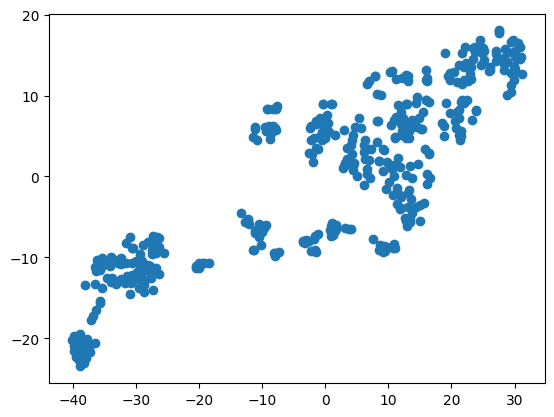

In [69]:
from matplotlib import pyplot as plt
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.


In [70]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [71]:
labels_train = model.fit_predict(X_train_scaled)

C:\Python 3.10.4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


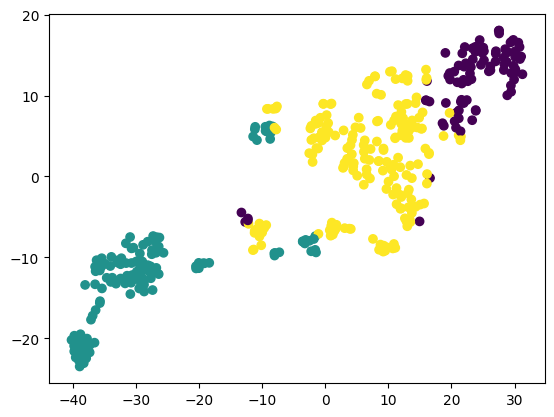

In [72]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.


In [73]:
print(Y_train[labels_train == 0].mean())
print(Y_train[labels_train == 1].mean())
print(Y_train[labels_train == 2].mean())


PRICE    27.788372
dtype: float64
PRICE    16.165354
dtype: float64
PRICE    24.958115
dtype: float64


In [74]:
print(X_train['CRIM'][labels_train == 0].mean())
print(X_train['CRIM'][labels_train == 1].mean())
print(X_train['CRIM'][labels_train == 2].mean())

0.07356558139534884
10.797028425196851
0.4216602094240837


## Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.


In [75]:
test_scaled = model.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [77]:
print(Y_test[test_scaled == 0].mean())
print(Y_test[test_scaled == 1].mean())
print(Y_test[test_scaled == 2].mean())

PRICE    31.35
dtype: float64
PRICE    16.437143
dtype: float64
PRICE    21.860784
dtype: float64


In [78]:
print(X_test['CRIM'][test_scaled == 0].mean())
print(X_test['CRIM'][test_scaled == 1].mean())
print(X_test['CRIM'][test_scaled == 2].mean())

0.06206
10.165531142857143
0.2660788235294118
